# Diabetes Risk Analysis - Data Preparation & EDA

## Project Scenario
**Role:** Data Scientist at a public health research institute.
**Goal:** Understand relationships between lifestyle, demographics, and diabetes to design targeted health interventions.

## Core Objectives
1. **Predicting Diabetes Diagnosis (Supervised Learning):**
   - Classify individuals into: *No Diabetes*, *Prediabetes*, or *Diabetes*.
   - Generate probability estimates for risk prioritzation.

2. **Understanding Population Segments (Unsupervised Learning):**
   - Cluster the population into meaningful groups based on health behaviors and demographics.
   - Analyze clusters for targeted campaigns (e.g., high BMI + low physical activity).

## Notebook Objectives
- Load and inspect the dataset.
- Clean data (duplicates, missing values).
- Perform Exploratory Data Analysis (EDA) to understand distributions and correlations.
- Prepare data for Modeling (Scaling, Encoding).

## 1. Library Import & Data Loading

The computational environment is established by importing libraries for data manipulation (`pandas`, `numpy`) and visualization (`seaborn`, `matplotlib`). The CDC Diabetes Dataset is then loaded to verify its integrity:
*   **Volume:** Approx. 253,680 records.
*   **Dimensions:** 22 features, pre-encoded numerically.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

# Load Data
file_path = '../data/raw/CDC Diabetes Dataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    
    # Display first 5 rows
    display(df.head())
    
    # Show dataframe info (rows, columns, datatypes)
    print(f"\nDataset Shape: {df.shape}")
    print("\nDataset Info:")
    df.info()
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path.")

Dataset loaded successfully.


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



Dataset Shape: (253680, 22)

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth            

## 2. Statistical Profiling

A statistical audit is performed using `df.describe().T` to understand the data's numerical shape.
*   **Continuous Variables:** Examination of `BMI` and `Age` for implausible outliers.
*   **Categorical Variables:** Verification of binary encoding consistency (0/1).

In [2]:
# Statistical summary of the dataset
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


## 3. Target Variable Distribution (The Imbalance Check)

`Diabetes_012` counts (0=No Diabetes, 1=Prediabetes, 2=Diabetes) are visualized to assess class imbalance. Significant disparity indicates standard accuracy may be misleading, necessitating:
*   **Resampling:** Techniques like SMOTE.
*   **Stratification:** Balanced train/test splits.
*   **Metrics:** Prioritization of Recall or F1-Score.

C:\Users\Dell\AppData\Local\Temp\ipykernel_14104\3913310029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=df, palette='viridis')


Class 0.0: 84.24%
Class 2.0: 13.93%
Class 1.0: 1.83%


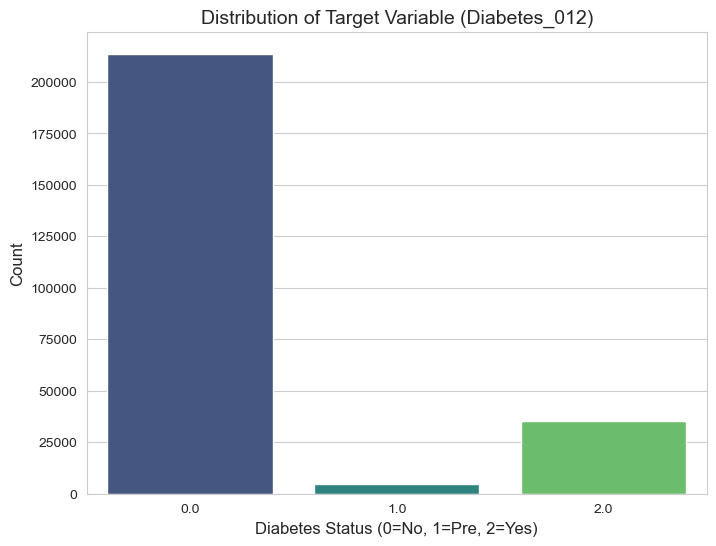

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=df, palette='viridis')
plt.title('Distribution of Target Variable (Diabetes_012)', fontsize=14)
plt.xlabel('Diabetes Status (0=No, 1=Pre, 2=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Calculate and print percentage distribution
counts = df['Diabetes_012'].value_counts(normalize=True) * 100
for i, count in counts.items():
    print(f"Class {i}: {count:.2f}%")

plt.show()

### Analysis of Class Imbalance and Data Insights

#### Distribution Analysis
The target variable, `Diabetes_012`, exhibits significant skewness. Individuals without diabetes (Class 0.0) comprise 84.24% of the population, while those with diabetes (Class 2.0) and prediabetes (Class 1.0) represent 13.93% and 1.83% respectively. 

From a data mining perspective, this represents a severe class imbalance. In classification contexts, such distributions risk the "Accuracy Paradox," where a model achieves high nominal accuracy by over-fitting to the majority class while failing to identify minority classes of interest.



#### Implications for Modeling and Evaluation
The rarity of the 'Prediabetes' class (1.83%) is critical. As this group is vital for early public health intervention, standard algorithms may treat these instances as noise. Consequently, the following strategies are required for the CRISP-DM phases:

* **Evaluation Metrics:** Accuracy is an insufficient performance indicator. This study will utilize Precision-Recall curves, F1-Scores, and Confusion Matrices to evaluate the model's ability to minimize Type II errors (False Negatives).
* **Resampling:** To ensure algorithms distinguish patterns of diabetic risk, synthetic data generation, specifically SMOTE (Synthetic Minority Over-sampling Technique)—or stratified under-sampling will be implemented.
* **Algorithm Selection:** Cost-sensitive learning and ensemble methods, such as Random Forests or Gradient Boosting, will be explored to handle non-linear indicators and imbalance more effectively than linear classifiers.



#### Key Risk Indicators
Correlation analysis suggests that lifestyle factors—specifically High Blood Pressure (HighBP), General Health (GenHlth), and Body Mass Index (BMI)—exhibit the strongest relationships with the target. These findings justify focusing on these features during Association Rule Mining (Apriori) and Clustering to identify distinct health-risk segments.

## 4. Correlation Analysis

Linear relationships between lifestyle factors and `Diabetes_012` are analyzed using a correlation matrix to identify high-impact predictors.
*   **Goal:** Filtering of noise and isolation of key risk factors.
*   **Anticipated Signals:** High correlations with `HighBP`, `GenHlth`, and `BMI`.

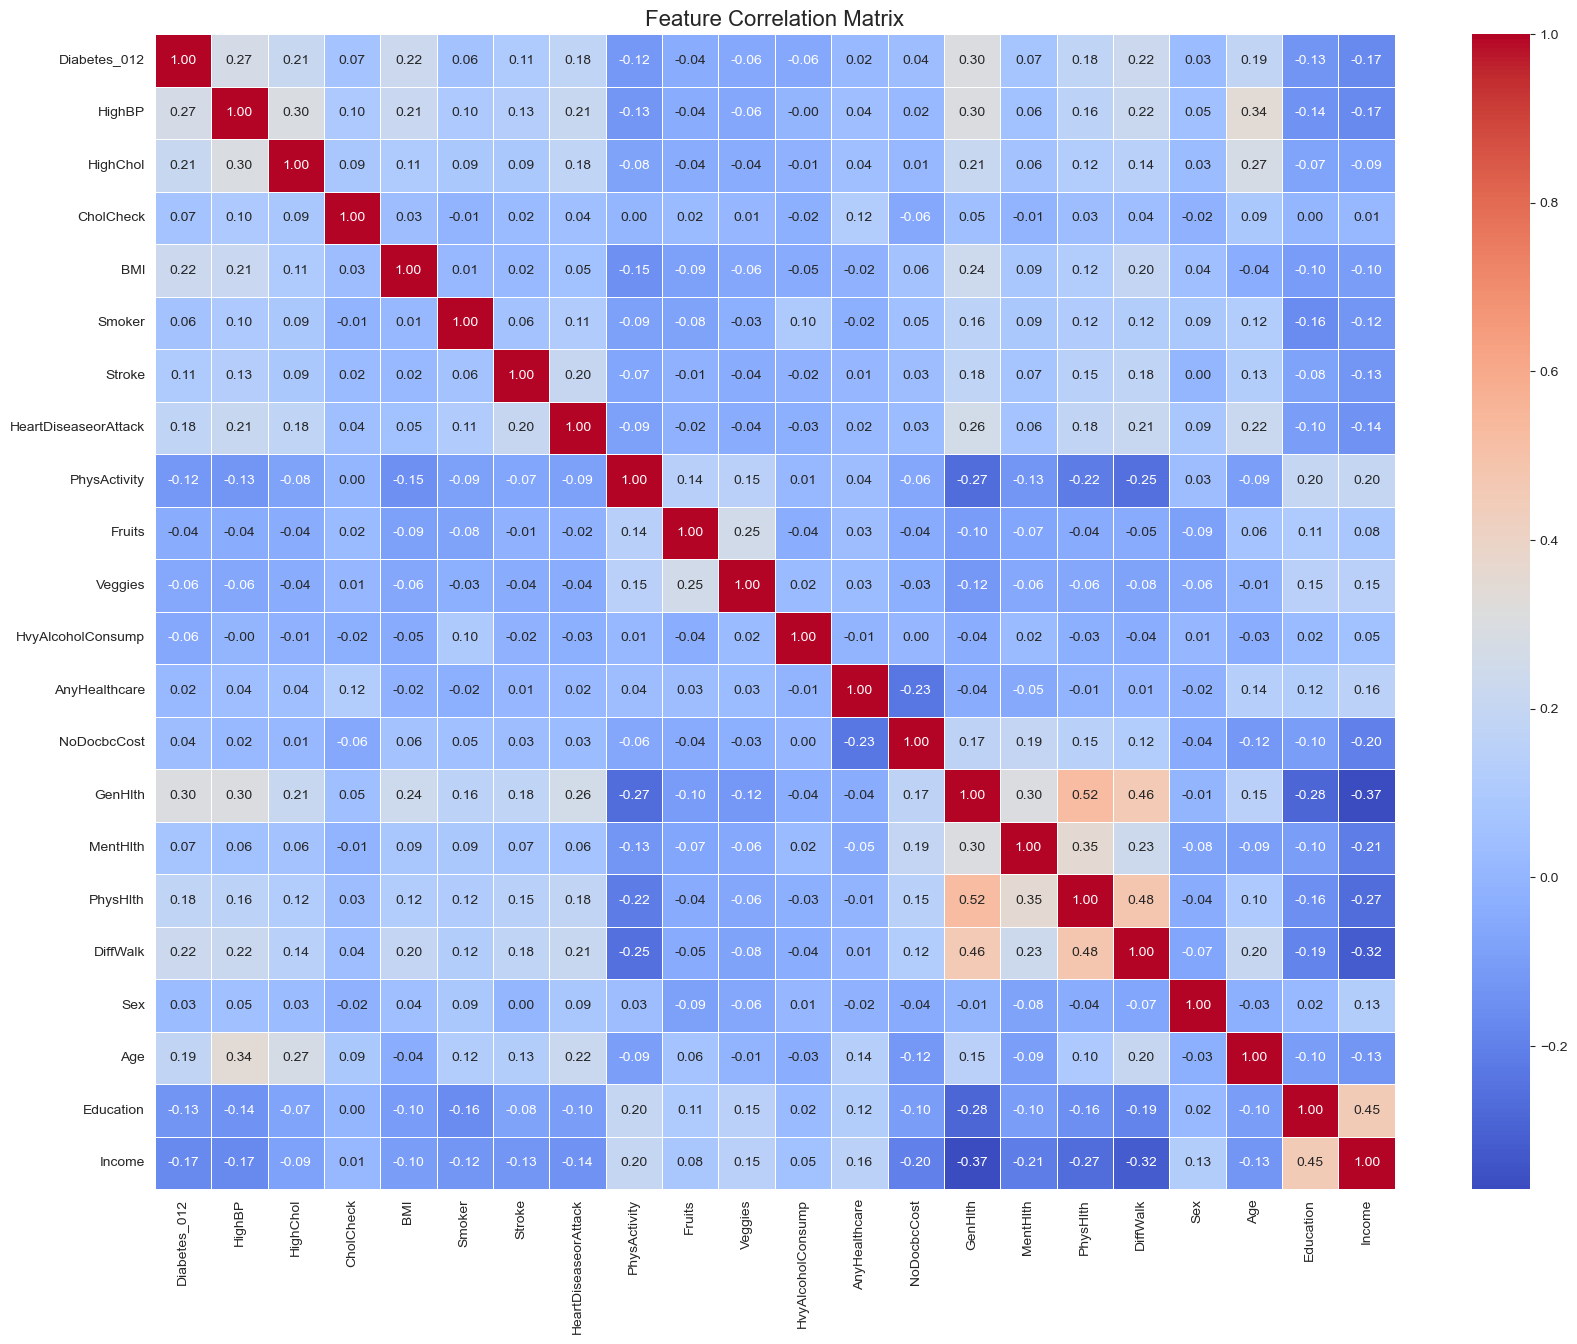

Top Correlated Features with Diabetes_012:
Diabetes_012    1.000000
GenHlth         0.302587
HighBP          0.271596
BMI             0.224379
DiffWalk        0.224239
HighChol        0.209085
Name: Diabetes_012, dtype: float64


In [4]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot Heatmap
plt.figure(figsize=(20, 15))
# Using a mask for the upper triangle to reduce visual clutter if desired, but full map is standard
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# Top correlations with Target
print("Top Correlated Features with Diabetes_012:")
print(corr_matrix['Diabetes_012'].sort_values(ascending=False).head(6))

### Correlation Analysis and Feature Selection

#### Statistical Overview
Correlation analysis using the Pearson coefficient identifies the health indicators most strongly associated with the target variable, `Diabetes_012`. The results indicate that **General Health (GenHlth)** has the highest positive correlation ($r \approx 0.30$), followed closely by **High Blood Pressure (HighBP)**, **Body Mass Index (BMI)**, **Difficulty Walking (DiffWalk)**, and **High Cholesterol (HighChol)**.



#### Clinical Relevance and Data Mining Strategy
These correlations align with established medical literature, which identifies hypertension, obesity, and perceived health status as primary predictors of metabolic disorders. From a technical perspective, these findings serve several purposes for the project:

* **Dimensionality Reduction:** While all 21 features will be considered, these top-correlated variables will be prioritized during feature engineering and as primary split nodes in decision-based classification models.
* **Clustering Foundations:** Variables such as `BMI` and `GenHlth` will be central to the Unsupervised Learning phase, as they likely drive the separation of high-risk versus low-risk population segments.
* **Association Rule Mining (Apriori):** These specific features will be binned into categorical labels (e.g., 'High Risk BMI') to discover frequent itemsets and generate high-lift rules for public health intervention.

#### Limitation Note
Although these features show the strongest linear relationship, the correlation coefficients are moderate (below 0.5). This suggests that diabetes risk is not dictated by a single factor but is an emergent property of multiple interacting lifestyle variables, justifying the use of complex non-linear models like Random Forests or Gradient Boosting.

## 5. Deep Dive into Key Risk Factors

Conditional distributions are examined using boxplots and stacked bars to characterize high-risk segments:
*   **BMI:** Comparison of distributions across diabetes statuses.
*   **Demographics:** Identification of disproportionate disease burdens across `Age` and `Income` groups.

C:\Users\Dell\AppData\Local\Temp\ipykernel_14104\1559331887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='Set2')


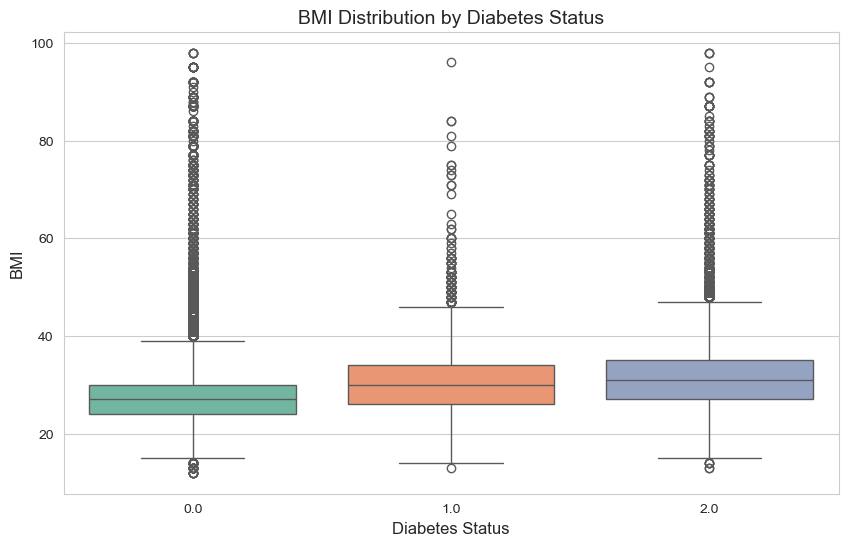

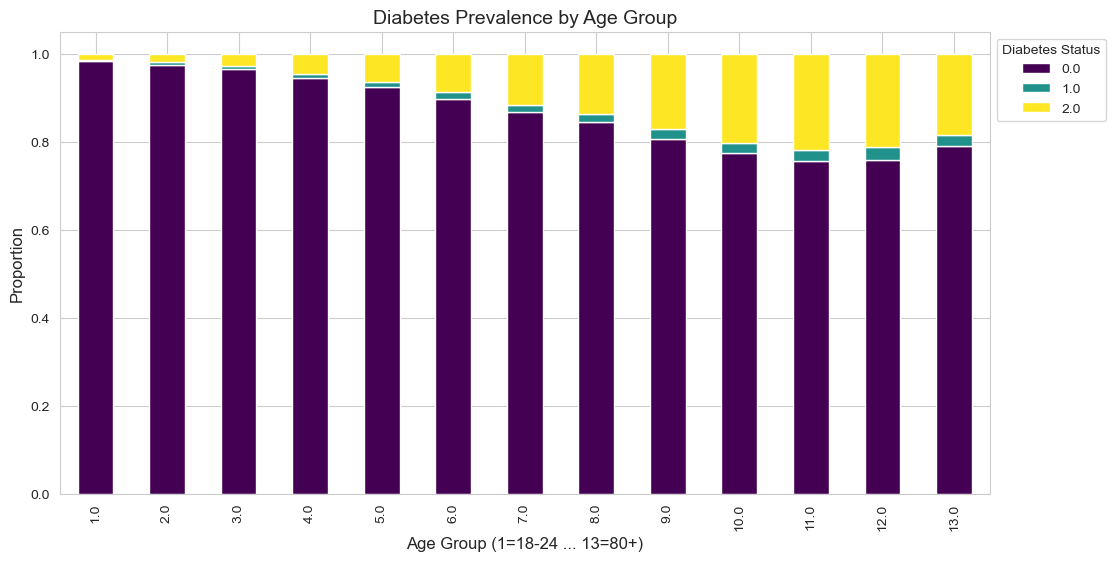

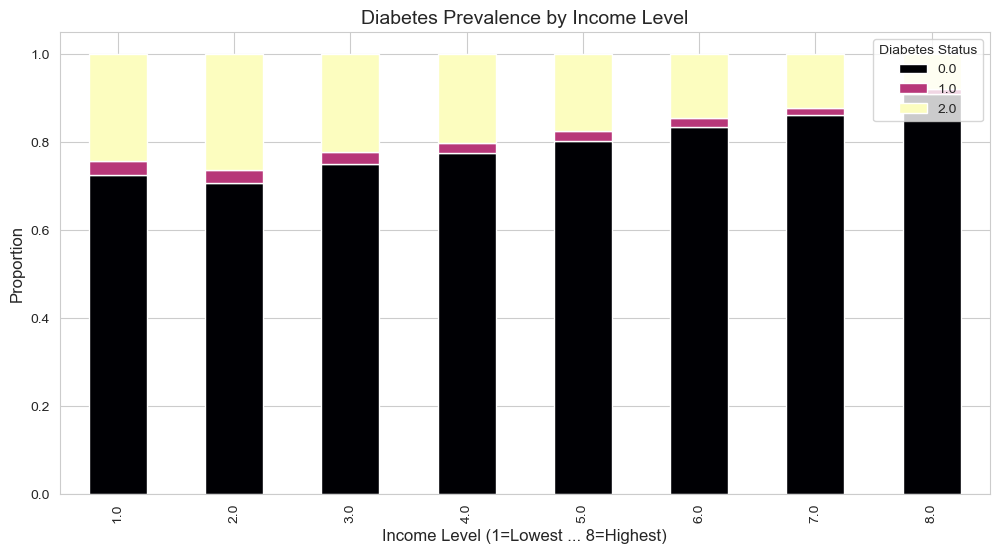

In [5]:
# 1. BMI Distribution by Diabetes Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='Set2')
plt.title('BMI Distribution by Diabetes Status', fontsize=14)
plt.xlabel('Diabetes Status', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.show()

# 2. Age vs Diabetes (Stacked Bar)
age_diabetes = pd.crosstab(df['Age'], df['Diabetes_012'], normalize='index')
age_diabetes.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Diabetes Prevalence by Age Group', fontsize=14)
plt.xlabel('Age Group (1=18-24 ... 13=80+)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Diabetes Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# 3. Income vs Diabetes (Stacked Bar)
income_diabetes = pd.crosstab(df['Income'], df['Diabetes_012'], normalize='index')
income_diabetes.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='magma')
plt.title('Diabetes Prevalence by Income Level', fontsize=14)
plt.xlabel('Income Level (1=Lowest ... 8=Highest)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Diabetes Status', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

## 6. Health & Lifestyle Matrix (Multivariate Analysis)

Interactions between **BMI** and **General Health (`GenHlth`)**, colored by diagnosis, are visualized to support unsupervised learning.
*   **Method:** Scatterplot of a representative sample to avoid overplotting.
*   **Goal:** Revelation of visual clusters (e.g., high BMI + poor health) to justify K-Means or Hierarchical clustering.

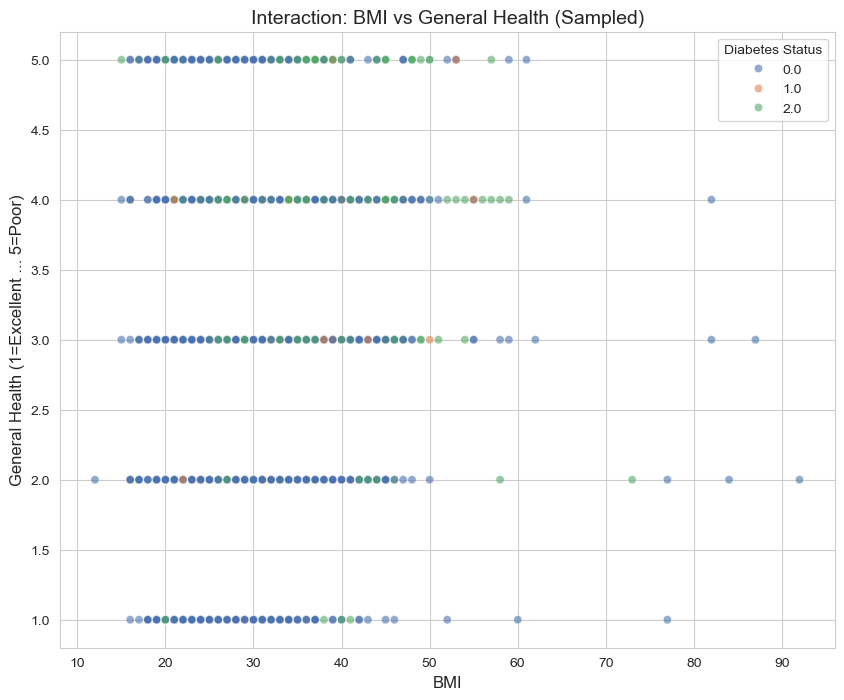

In [6]:
# Using a sample to prevent overplotting and improve performance
sample_df = df.sample(n=5000, random_state=42)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=sample_df, 
    x='BMI', 
    y='GenHlth', 
    hue='Diabetes_012', 
    palette='deep', 
    alpha=0.6
)
plt.title('Interaction: BMI vs General Health (Sampled)', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('General Health (1=Excellent ... 5=Poor)', fontsize=12)
plt.legend(title='Diabetes Status')
plt.show()



#### Scatterplot Interpretation: BMI vs. Physical Health
The scatterplot illustrating the relationship between **Body Mass Index (BMI)** and **Physical Health (PhysHlth)**, representing the number of days of illness/injury in the last 30 days reveals critical patterns for risk assessment. 

* **Concentration and Density:** A significant density of data points is clustered in the lower-left quadrant, representing individuals with a "Healthy" BMI range (18.5–25) and zero days of poor physical health.
* **Trend Analysis:** There is a discernible positive trend where higher BMI values correlate with a greater frequency of poor physical health days. This suggests that as obesity levels increase, the cumulative physiological "burden" on the individual also rises, which is a primary precursor to diabetes.



#### Identification of Outliers and Data Noise
The scatterplot highlights several "extreme" values, with some BMI records exceeding 70. In a clinical context, these are valid but extreme outliers.
* **Data Preparation Strategy:** These outliers will be retained rather than dropped, as they represent the highest-risk population segments the Public Health Institute is most concerned with. However, to ensure these extremes do not disproportionately influence the **K-Means Clustering** algorithm, robust scaling (e.g., `StandardScaler` or `MinMaxScaler`) will be applied.

#### Implications for Clustering and Classification
The "fan" shape of the scatterplot (heteroscedasticity) indicates that high BMI does not *guarantee* poor physical health, but it significantly increases the variance. 
* **For Clustering:** This variance justifies the use of **General Health (GenHlth)** as a third dimension to help the algorithm distinguish between "Physically Resilient" and "Physically Vulnerable" high-BMI individuals.
* **For Classification:** The overlapping nature of the points suggests that a simple linear boundary will fail to separate diabetic classes. This provides further evidence for the necessity of **non-linear ensemble models** like Random Forest or XGBoost.

## 7. Data Quality Summary

Data integrity is assessed to finalize readiness for preprocessing.
*   **Null Values:** Confirmation of completeness.
*   **Duplicates:** Check for potential bias. High volume may require strategic retention decisions given the categorical nature of survey data.

In [7]:
print("Missing Values Summary:")
print(df.isnull().sum().sum())

print("\nDuplicate Records Summary:")
duplicates = df.duplicated().sum()
print(f"Count: {duplicates}")
print(f"Percentage: {duplicates / len(df) * 100:.2f}%")

Missing Values Summary:
0

Duplicate Records Summary:
Count: 23899
Percentage: 9.42%
